In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

In [ ]:
# Read in data
df=pd.read_csv("/content/drive/MyDrive/ML/chrome_reviews.csv")
df.head()
df=df.head(2000)

# New Section

In [ ]:
df.shape

(2000, 10)

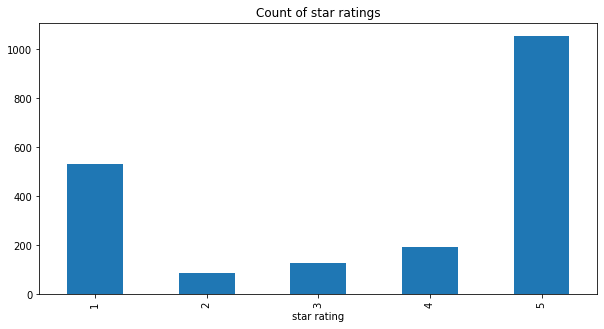

In [ ]:
df['Star'].value_counts().sort_index().plot(kind='bar',title='Count of star ratings',figsize=(10,5),)
plt.xlabel('star rating')
plt.show()

In [ ]:
example=df['Text'][12]
print(example)

App is not getting update and it is not getting open too and saying u r using very old version plz update but it is not updating...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['App', 'is', 'not', 'getting', 'update', 'and', 'it', 'is', 'not', 'getting']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('App', 'NNP'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('getting', 'VBG'),
 ('update', 'JJ'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('getting', 'VBG')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE App/NNP)
  is/VBZ
  not/RB
  getting/VBG
  update/JJ
  and/CC
  it/PRP
  is/VBZ
  not/RB
  getting/VBG
  open/VB
  too/RB
  and/CC
  saying/VBG
  u/JJ
  r/NN
  using/VBG
  very/RB
  old/JJ
  version/NN
  plz/NN
  update/NN
  but/CC
  it/PRP
  is/VBZ
  not/RB
  updating/JJ
  .../:)


**Vader sentiment scoring**

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'compound': 0.6468, 'neg': 0.0, 'neu': 0.318, 'pos': 0.682}

In [ ]:
sia.polarity_scores(example)

{'compound': 0.0726, 'neg': 0.0, 'neu': 0.949, 'pos': 0.051}

In [ ]:
#Run the polarity score on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['ID']
    #str(review).encode('utf-8')
    res[myid]=sia.polarity_scores(str(text))

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=vaders.merge(df,how='left')

In [ ]:
# now we have sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,0.000,1.000,0.000,0.0000,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,0.000,0.000,1.000,0.4404,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,0.000,1.000,0.000,0.0000,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,0.000,0.263,0.737,0.4215,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,0.487,0.513,0.000,-0.2263,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


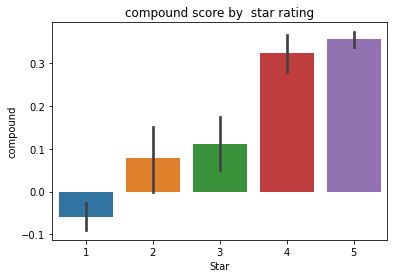

In [ ]:
#plot vadar results
ax=sns.barplot(data=vaders,x='Star',y='compound')
ax.set_title("compound score by  star rating")
plt.show()

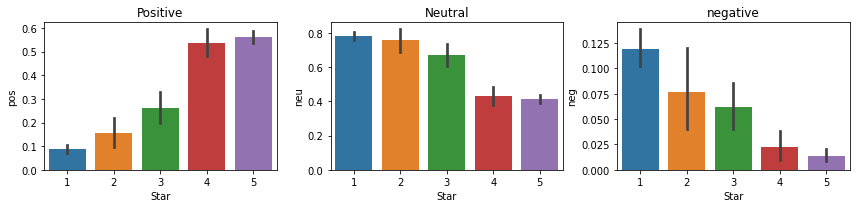

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Star',y='pos',ax=axis[0])
sns.barplot(data=vaders,x='Star',y='neu',ax=axis[1])
sns.barplot(data=vaders,x='Star',y='neg',ax=axis[2])
axis[0].set_title('Positive')
axis[1].set_title('Neutral')
axis[2].set_title('negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Vader results on example
print(example)
sia.polarity_scores(example)

App is not getting update and it is not getting open too and saying u r using very old version plz update but it is not updating...


{'compound': 0.0726, 'neg': 0.0, 'neu': 0.949, 'pos': 0.051}

In [ ]:
#Roberta model on example
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': 0.8055048, 'roberta_neu': 0.18069899, 'roberta_pos': 0.013796182}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]}
  return scores_dict


In [ ]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['ID']
    vader_res=sia.polarity_scores(str(text))
    vader_result_rename={}
    for key,value in vader_res.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_res=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_res}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id{myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

Broke for id83322


In [ ]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'ID'})
results_df=results_df.merge(df,how='left')
results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,0.000,1.000,0.000,0.0000,0.001982,0.036103,0.961915,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,0.000,0.000,1.000,0.4404,0.060793,0.329428,0.609779,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,0.000,1.000,0.000,0.0000,0.810179,0.174723,0.015098,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,0.000,0.263,0.737,0.4215,0.012006,0.084710,0.903284,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,0.487,0.513,0.000,-0.2263,0.763222,0.225679,0.011099,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,90418,0.000,1.000,0.000,0.0000,0.012266,0.211875,0.775858,https://play.google.com/store/apps/details?id=...,👌👌👌,5,0,Surendar Kumar,NaN,74.0.3729.136,2021-01-07,com.android.chrome
1995,90419,0.000,0.000,1.000,0.4404,0.060793,0.329428,0.609779,https://play.google.com/store/apps/details?id=...,Good,5,0,H. P. R khiladi,NaN,84.0.4147.125,2021-01-07,com.android.chrome
1996,90420,0.180,0.820,0.000,-0.8720,0.735494,0.237611,0.026895,https://play.google.com/store/apps/details?id=...,I too man Can't update my mobile chrome My mob...,1,0,harsh tamrakar,NaN,87.0.4280.101,2021-01-07,com.android.chrome
1997,90421,0.000,0.684,0.316,0.5719,0.001949,0.010769,0.987282,https://play.google.com/store/apps/details?id=...,This is one of the excellent app I used ever,4,0,Sushant Kumar,NaN,87.0.4280.101,2021-01-07,com.android.chrome


In [ ]:
results_df.query('Star==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

'It is the best app for browsing'

In [ ]:
results_df.query('Star==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'Good'

In [ ]:
results_df.query('Star==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'Useless'

In [ ]:
results_df.query('Star==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

'Very irritable working for some days'

In [ ]:
if(roberta_pos>0.5):
  a=results_df.query('Star==1' or 'Star==2').sort_values('roberta_pos',ascending=False)['Text']
  b=results_df.query('Star==4' or 'Star==5').sort_values('roberta_neg',ascending=False)['Text']
list1=[]
for i in a:
  list1.append(i)
for j in b:
  list1.append(j)
len(list1)


727

In [ ]:
mis_df=pd.DataFrame()

mis_df['misclassified Text']=list1

mis_df.to_csv("misclassified reviews", index=False)
mis_df

,misclassified Text
0,It is the best app for browsing
1,Is fast secure I love it
2,Best app
3,Cool app
4,IT IS GOOD FOR GAMING
...,...
722,Really good for finding answers and has lots o...
723,Best it lit Very lit I Love It Is Good
724,Superbly simple and easy to use 🤩🤩
725,Good browser worldwide #GoogleChrome💯


In [ ]:
percent=(len(mis_df)/len(df))*100

In [ ]:
percent

36.35